In [2]:
import matplotlib.pyplot as plt
import numpy as np

The following block of code defines the blurring matrix $A$ of size $n\times n$, with a Gaussian kernel having blurring parameter $z>0$.

In [3]:
def h_gaussian(s,t,z=.025):                 # Gaussian kernel     
    c = 1/(np.sqrt(np.pi)*z)
    return c*np.exp(-np.power(s-t,2)/(z**2))
                  
def build_blur_A_gaussian(n=570,z=.01):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_gaussian(s[j],t,z)/n
    return A

The following function defines the UPC barcode function $f(t)$ for a can of Coke.  It returns:
* $A$, the blurring matrix of size $570\times 570$ with $z=0.01$;
* $b$, the "exact" blurred vector;
* $b_{noise}$, the blurred vector, polluted with noise;
* $f_{true}$, the exact barcode function we are trying to recover.

The noise level for the vector $b_{noise}$ is set to $10^{-3} \|b\|$.

In [9]:
def coke_upc():
    
# encode the UPC code for a can of Coke

    code = np.array([0, 1, 1, 1,
                     3, 2, 1, 1,
                     1, 1, 3, 2,
                     3, 1, 1, 2, 
                     3, 2, 1, 1, 
                     3, 2, 1, 1, 
                     3, 2, 1, 1, 
                     1, 1, 1, 1, 1,
                     3, 2, 1, 1, 
                     2, 1, 2, 2, 
                     1, 3, 1, 2, 
                     1, 1, 1, 4, 
                     1, 3, 1, 2, 
                     3, 1, 1, 2,
                     1, 1, 1])
    code = np.cumsum(code)/np.sum(code)
    
# set up the blurring matrix (dimension 500)   
    n = 570
    z = 0.01
    A = build_blur_A_gaussian(n,z)

# set up the true (unblurred) barcode function
    t = np.array([(k-.5)/n for k in range(1,n+1)])
    ftrue = np.zeros(t.shape)
    for k in range(0,t.size):
        if t[k]<1.0:
            ftrue[k] = np.mod(np.min(np.argwhere(t[k] < code)),2)

# compute the exact blurred barcode

    b = A@ftrue
    
# add a bit of noise to the blurred barcode
# edit the "1e-3" term to adjust the noise level

    bnoise = b + np.linalg.norm(b)*1e-3*np.random.randn(n)
    
    return A, b, bnoise, ftrue


Generate the matrix $A$, the "exactly" blurred vector $b$, the noisy version $b_{noise}$, and the true solution $f_{true}$.

In [5]:
A, b, bnoise, ftrue = coke_upc()

The cell below demonstrates how to make elongated plots showing vectors like $f$ and $b$.

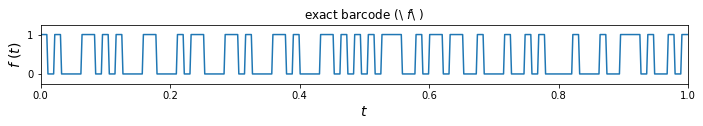

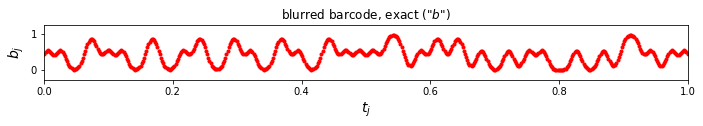

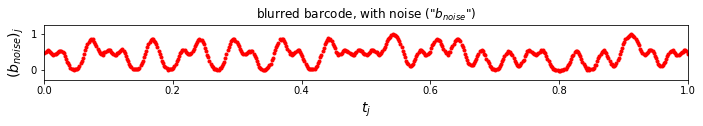

In [6]:
n = 570
t = np.array([(k-.5)/n for k in range(1,n+1)])

plt.figure(figsize=(10,1.85))
plt.plot(t,ftrue)
plt.xlim((0,1))
plt.ylim((-.25,1.25));
plt.title('exact barcode (\ $f$\ )')
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$f\ (t)$',fontsize=14)
plt.tight_layout()

plt.figure(figsize=(10,1.85))
plt.plot(t,b,'r.')
plt.xlim((0,1))
plt.ylim((-.25,1.25));
plt.title('blurred barcode, exact ("$b$")')
plt.xlabel('$t_j$',fontsize=14)
plt.ylabel('$b_j$',fontsize=14)
plt.tight_layout()

plt.figure(figsize=(10,1.85))
plt.plot(t,bnoise,'r.')
plt.xlim((0,1))
plt.ylim((-.25,1.25));
plt.title('blurred barcode, with noise ("$b_{noise}$")')
plt.xlabel('$t_j$',fontsize=14)
plt.ylabel('$(b_{noise})_j$',fontsize=14)
plt.tight_layout()
